### Project Description: kuzushiji images classification

1. Build: python 3.10

2. Clone from: https://github.com/rois-codh/kmnist

3. About the Kuzushiji-49 dataset used:

   > Kuzushiji-49, as the name suggests, has 49 classes (28x28 grayscale, 270,912 images), is a much larger, but imbalanced dataset containing 48 Hiragana characters and one Hiragana iteration mark.

### Clone dataset

you can run kuzushiji-49.py in terminal in order to download kuzushiji-49
> python kuzushiji-49

or you can download dataset by hand in:
https://www.kaggle.com/datasets/anokas/kuzushiji

### View Dataset

Load Reference:
1. https://stackoverflow.com/questions/18231135/load-compressed-data-npz-from-file-using-numpy-load
2. source code demo from Kuzushiji-49 dataset

Visualize Reference:
1. https://blog.csdn.net/DarrenXf/article/details/120107983
2. https://blog.csdn.net/qq_41554005/article/details/116093092

In [2]:
import numpy as np

def load(f):
    return np.load(f)['arr_0']

train_data, train_label = load('kuzushiji-49/k49-train-imgs.npz'), load('kuzushiji-49/k49-train-labels.npz')
test_data, test_label = load('kuzushiji-49/k49-test-imgs.npz'), load('kuzushiji-49/k49-test-labels.npz')

# shape: (28, 28)
print(f"Shape: {train_data[0].shape}")

# data
print(train_data[0], "\n", train_label[0])

del train_data, train_label, test_data, test_label

Shape: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0  69 213  39  32 193  52   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  58 235  65   0   0  64 222  15   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8 213  59   0   0   0   9 229  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  47 164   0   0   1  37  30 174  90   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  77 132  28  84 172 252 239 199  10   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  65 253 248 255 203 132  26 200 123  56
   62  38   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1 117 150  72   6   0   0 176 255 255
  255 200   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 208 255 250
  173  39   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

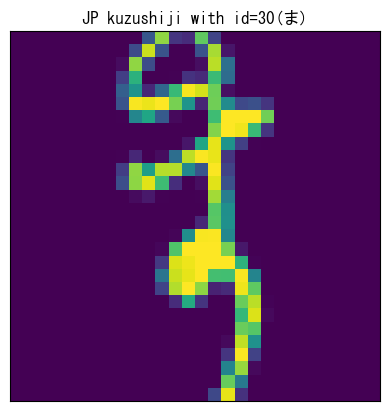

In [3]:
# Visualization
import csv
import matplotlib.pyplot as plt


train_data, train_label = load('kuzushiji-49/k49-train-imgs.npz'), load('kuzushiji-49/k49-train-labels.npz')
test_data, test_label = load('kuzushiji-49/k49-test-imgs.npz'), load('kuzushiji-49/k49-test-labels.npz')
DATA_CLASSMAP = './kuzushiji-49/k49_classmap.csv'

def _search_classmap(id):
    try:
        with open("{}".format(DATA_CLASSMAP), 'r', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                if str(id) == row['index']:
                    return row['char']
            return "Not found"
        
    except FileNotFoundError:
        print("File is not open: check your DATA_CLASSMAP")
        return ""
    
    except Exception as e:
        print(f"ERROR: {e}")
        return ""
        
def visualization(index):
    plt.imshow(train_data[index], interpolation='nearest')
    plt.title('JP kuzushiji with id={}({})'.format(train_label[index], _search_classmap(train_label[index])), fontname="MS Gothic")
    plt.xticks([]) # 去掉刻度值
    plt.yticks([])
    plt.show()
    
visualization(0)  

### Build model in pytorch

Reference:
1. torch.nn.Module
    - https://ithelp.ithome.com.tw/articles/10279986
    
2. torch.utils.data.Dataset && torch.utils.data.Dataloader
    - https://rowantseng.medium.com/pytorch-%E8%87%AA%E5%AE%9A%E7%BE%A9%E8%B3%87%E6%96%99%E9%9B%86-custom-dataset-7f9958a8ff15
    - https://blog.csdn.net/ljp1919/article/details/116484330
    - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
    - https://saturncloud.io/blog/converting-from-numpy-array-to-pytorch-tensor-a-comprehensive-guide/
    - https://blog.csdn.net/weixin_41560402/article/details/108121344
    
3. Train && Test
    - https://hackmd.io/@lido2370/SJMPbNnKN?type=view

4. CNN theory recall
    - https://blog.csdn.net/csdn_xmj/article/details/116206119
    - https://blog.csdn.net/weixin_44912159/article/details/105345760

In [4]:
import torch.nn as nn

# IMG_Channel, IMG_ROWS, IMG_COLS = 1, 28, 28

class KUZ_Model(nn.Module):
    def __init__(self):
        super(KUZ_Model, self).__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1), # output shape 3 * (28-2) * (28-2)
            nn.ReLU(),
            nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=1), # output shape 5 * (28-2-2) * (28-2-2)
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(5*24*24, 128),
            nn.ReLU(),
            nn.Linear(128, 50),
            nn.Softmax()
        )
    
    def forward(self, x):
        return self.network(x)
    
print(KUZ_Model())

"""
from torchinfo import summary
summary(KUZ_Model, input_size=[28,28])
"""

KUZ_Model(
  (network): Sequential(
    (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=2880, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=50, bias=True)
    (8): Softmax(dim=None)
  )
)


'\nfrom torchinfo import summary\nsummary(KUZ_Model, input_size=[28,28])\n'

In [5]:
import numpy as np
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

def load(f):
    return np.load(f)['arr_0']

class KUZ49_Dataset(Dataset):
    def __init__(self, DATA_DIR_ROOT, split, transform):
        # --------------------------------------------
        # Initialize paths, transforms, and so on
        # --------------------------------------------
        self.transform = transform
        
        if split != "test" and split != "train":
            print("SYNTAX ERROR WHILE LOADING KUZ49_Dataset")
            
        self.imgs = load(f'{DATA_DIR_ROOT}/k49-{split}-imgs.npz')     
        self.img_labels = load(f'{DATA_DIR_ROOT}/k49-{split}-labels.npz')
        
    def __getitem__(self, index) -> tuple[torch.Tensor, int]:
        # --------------------------------------------
        # 1. Read from file (using numpy.fromfile, PIL.Image.open)
        # 2. Preprocess the data (torchvision.Transform).
        # 3. Return the data (e.g. image and label)
        # --------------------------------------------
        image, label = self.imgs[index], self.img_labels[index]
        
        if self.transform is not None:
            image = self.transform(image)
            label = self.transform(label)
        else:
            image = torch.from_numpy(image).type(torch.LongTensor)
            label = torch.from_numpy(label).type(torch.LongTensor)
        
        return image, label
        
    def __len__(self) -> int:
        # --------------------------------------------
        # Indicate the total size of the dataset
        # -------------------------------------------
        return len(self.imgs)
    
    def _imageShape(self):
        return self.imgs.shape


In [6]:
# TEST AREA: torch.tensor
import torch

tensor1 = torch.tensor([1,2,3,4])
tensor2 = torch.randn(2, 4)
print(tensor2)

print(torch.max(tensor2, 1)[0])
print(torch.max(tensor2, 1)[1])

tensor([[-0.8171,  0.3016,  0.2358,  1.4716],
        [ 0.6366,  1.1958, -0.0111, -1.0026]])
tensor([1.4716, 1.1958])
tensor([3, 1])


In [7]:
from tqdm.auto import tqdm

def _trainstep(model: torch.nn.Module, 
              train_loader: torch.utils.data.DataLoader, 
              loss_func: torch.nn.Module, 
              optimizer: torch.optim.Optimizer):

    train_loss, train_acc = 0, 0 
    
    model.train()
    for batch, (images, labels) in enumerate(train_loader):
        # Get Loss
        outputs = model(images)
        loss = loss_func(outputs, labels)
        train_loss += loss.item()
        
        # Compute && Update Gradient
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate and accumulate accuracy metric across all batches
        predict_Seq = torch.max(outputs, 1)[1]
        train_acc += ((predict_Seq==labels).sum().item()/len(outputs))
        
    train_loss = train_loss / len(train_loader)
    train_acc = train_acc / len(train_loader)
    return train_loss, train_acc

def _teststep(model: torch.nn.Module, 
              test_loader: torch.utils.data.DataLoader, 
              loss_func: torch.nn.Module):
    
    test_loss, test_acc = 0, 0
    
    model.eval()
    with torch.no_grad():
        for batch, (images, labels) in enumerate(test_loader):
            # Get Loss
            outputs = model(images)
            loss = loss_func(outputs, labels)
            test_loss += loss.item()
             
            # Calculate and accumulate accuracy metric across all batches
            predict_Seq = torch.max(outputs, 1)[1]
            test_acc += ((predict_Seq==labels).sum().item()/len(outputs))
            
def fit_model(model: torch.nn.Module, 
              train_loader: torch.utils.data.DataLoader, 
              test_loader: torch.utils.data.DataLoader,
              loss_func: torch.nn.Module, 
              optimizer: torch.optim.Optimizer,
              input_shape: any, num_epochs: int):
    
    results = {
        "train_loss": [], 
        "train_acc": [], 
        "test_loss": [], 
        "test_acc": []
    }
    
    for epoch in tqdm(range(num_epochs)):
        train_loss, train_acc = _trainstep(model, train_loader, loss_func, optimizer)            
        test_loss, test_acc = _teststep(model, test_loader, loss_func) 
        
        # print
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        
        # Note: The results obtained correspond to each epoch's performance metrics.
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc) 
        results["test_loss"].append(test_loss) 
        results["test_acc"].append(test_acc) 

d:\Web_related\Japanese_Learning_Tools_using_REACT\model\venv-python310-data\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Hyper Parameters
LR = 0.01
batch_size = 32
num_epochs = 1

# Pytorch DataLoader
train_loader = DataLoader(KUZ49_Dataset(DATA_DIR_ROOT='kuzushiji-49', split='train', transform=None), batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(KUZ49_Dataset(DATA_DIR_ROOT='kuzushiji-49', split='test', transform=None), batch_size=batch_size, shuffle=True, num_workers=4)

# 
model = KUZ_Model()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted
input_shape = (1,28,28)

fit_model(model, train_loader, test_loader, loss_func, optimizer, input_shape, num_epochs)

### Save model

In [ ]:
torch.save(model, 'save.pt')